# Data Bootcamp Final Project: Drivers Behind the Performance of Retailers

#### Crystal Falcon and Shawn An
##### crystal.falcon@stern.nyu.edu   /   shawn.an@stern.nyu.edu

## Abstract
For our project, we were interested in analyzing the ongoing transformation of the clothing retail sector as our economy becomes increasingly digital. As the threat of e-commerce and online shopping looms larger for brick-and-mortar retailers, we sought to isolate the impact of e-commerce activity on the performance of three different types of retailers: department stores, discount retailers, and brand holding companies. We limited our sample size to forty publicly-traded retailers in the U.S. and collected data capturing performance and performance drivers for each of these firms in the past five years. 


## Data
For the forty firms in our sample, we observed two performance metrics and three performance drivers during the period between fiscal year 2013 and fiscal year 2017. Our sample includes twelve department stores, five discount retailers, and twenty-three brand holding companies of varying size and market positioning. We chose enterprise value-to-sales multiples and net income margins as our performance metrics, and SG&A margin, e-commerce sales margin, and total square footage as performance drivers. The data was sourced primarily through three sources: Bloomberg, another market research platform called eMarketer, and SEC-filed 10-K’s. 

In regards to performance metrics, we used EV-to-sales multiples in order to capture public market sentiment, which would be valuable in determining whether our performance drivers have substantial impact on the value investors attribute to specific retailers. Additionally, we wanted to use a revenue multiple given its importance in the retail space. Our other performance metric, net income margin would be a direct representation of each firms’ profitability, allowing us to analyze which of our performance drivers have the largest impact on retailers’ bottom lines.

With regards to performance drivers, e-commerce as a percentage of revenue is intended to capture how readily consumers adopt a retailers’ e-commerce platform if they operate one. We included two additional drivers to assess the impact of e-commerce sales relative to other factors. We thought SG&A margin would be a significant indicator of the degree of investment firms place on sales, advertising, and other marketing tactics. Finally, total square footage tells us whether management is deciding to expand or contract the physical retail space operated by their firm, demonstrating how efficiently or effectively retailers are utilizing their brick-and-mortar stores. 


In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pylab as pl
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

/Users/Crystal/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Importing Data
url_nim = "https://raw.githubusercontent.com/shawnawn/Data_Bootcamp_Final_Project/master/netincomemargin.V1.csv"
net_income_margin = pd.read_csv(url_nim)

evsales_url = "https://raw.githubusercontent.com/shawnawn/Data_Bootcamp_Final_Project/master/EVsales1.csv"
evsales = pd.read_csv(evsales_url)

url_sga = "https://raw.githubusercontent.com/shawnawn/Data_Bootcamp_Final_Project/master/SGAmargin.V1.csv"
sga_margin = pd.read_csv(url_sga)

url_ec = "https://raw.githubusercontent.com/shawnawn/Data_Bootcamp_Final_Project/master/ecommercemargin.V1.csv"
ec_margin = pd.read_csv(url_ec)

url_sf = "https://raw.githubusercontent.com/shawnawn/Data_Bootcamp_Final_Project/master/squarefootage.V1.csv"
square_footage = pd.read_csv(url_sf)

net_income_margin.head()

,Category,Company Name,Ticker,Measure,2012,2013,2014,2015,2016
0,Department Stores,Kohl's Corp,KSS,Net Income Margin,5.11%,4.67%,4.56%,3.50%,2.98%
1,Department Stores,Macy's Inc,M,Net Income Margin,4.82%,5.32%,5.43%,3.96%,2.40%
2,Department Stores,Nordstrom Inc,JWN,Net Income Margin,6.06%,5.85%,5.33%,4.16%,2.40%
3,Department Stores,Dillard's,DDS,Net Income Margin,4.98%,4.84%,4.89%,3.99%,2.64%
4,Department Stores,JC Penney Co Inc,JCP,Net Income Margin,-7.59%,-10.78%,-5.85%,-4.06%,0.01%


In [3]:
net_income_margin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
Category        40 non-null object
Company Name    40 non-null object
Ticker          40 non-null object
Measure         40 non-null object
2012            40 non-null object
2013            40 non-null object
2014            40 non-null object
2015            40 non-null object
2016            40 non-null object
dtypes: object(9)
memory usage: 2.9+ KB


Pandas recognizes our percentages as strings when we want them to be floating numbers. We will first clean up our data so we can convert it.

In [4]:
net_income_margin = net_income_margin.replace('%','', regex=True) #getting rid of %
net_income_margin.head()

,Category,Company Name,Ticker,Measure,2012,2013,2014,2015,2016
0,Department Stores,Kohl's Corp,KSS,Net Income Margin,5.11,4.67,4.56,3.50,2.98
1,Department Stores,Macy's Inc,M,Net Income Margin,4.82,5.32,5.43,3.96,2.40
2,Department Stores,Nordstrom Inc,JWN,Net Income Margin,6.06,5.85,5.33,4.16,2.40
3,Department Stores,Dillard's,DDS,Net Income Margin,4.98,4.84,4.89,3.99,2.64
4,Department Stores,JC Penney Co Inc,JCP,Net Income Margin,-7.59,-10.78,-5.85,-4.06,0.01


Now that it's a string of numbers, lets convert it.

In [5]:
net_income_margin = net_income_margin.apply(pd.to_numeric, errors='ignore') 
net_income_margin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
Category        40 non-null object
Company Name    40 non-null object
Ticker          40 non-null object
Measure         40 non-null object
2012            40 non-null float64
2013            40 non-null float64
2014            40 non-null float64
2015            40 non-null float64
2016            40 non-null float64
dtypes: float64(5), object(4)
memory usage: 2.9+ KB


Great, now we can manipulate them as numbers. Let's do the same for our other dataframes.

In [6]:
sga_margin = sga_margin.replace('%','', regex=True)

ec_margin = ec_margin.replace('%','', regex=True)

square_footage = square_footage.replace('Holidng','Holding', regex=True)
square_footage = square_footage.replace('-','0', regex=True)

In [7]:
evsales = evsales.apply(pd.to_numeric, errors='ignore')

sga_margin = sga_margin.apply(pd.to_numeric, errors='ignore')

ec_margin = ec_margin.apply(pd.to_numeric, errors='ignore')

square_footage = square_footage.apply(pd.to_numeric, errors='ignore')

We want to be able to do analysis on the different sectors within retail, rather than each individual company. We will use a groupby function to get the mean data for each of the three sectors.

In [8]:
evsales_groups = evsales.groupby('Category').mean() 
nim_groups = net_income_margin.groupby('Category').mean()
sga_groups = sga_margin.groupby('Category').mean()
ec_groups = ec_margin.groupby('Category').mean()
sf_groups = square_footage.groupby('Category').mean()

sga_groups.head()

,2012,2013,2014,2015,2016
Category,,,,,
Brand Holding Companies,30.716087,30.954783,31.576957,31.742174,32.473913
Department Stores,25.630833,25.477500,25.227500,25.313333,25.995833
Discount Retail,24.774000,24.974000,24.628000,24.534000,25.010000


In [9]:
evsales_groups.head()

,4/30/12,7/31/12,10/31/12,1/31/13,4/30/13,7/31/13,10/31/13,1/31/14,4/30/14,7/31/14,10/31/14,1/31/15,4/30/15,7/31/15,10/31/15,1/31/16,4/30/16,7/31/16,10/31/16,1/31/17
Category,,,,,,,,,,,,,,,,,,,,
Brand Holding Companies,2.028261,1.905217,1.906957,1.881739,1.769565,1.866522,1.903043,1.89913,1.80087,1.725217,1.749565,1.763043,1.772174,1.771304,1.670435,1.535217,1.470435,1.424348,1.415217,1.318696
Department Stores,0.683333,0.659167,0.707500,0.687500,0.663333,0.729167,0.738333,0.78500,0.75250,0.738333,0.741667,0.785833,0.786667,0.762500,0.687500,0.608333,0.591667,0.537500,0.570000,0.592500
Discount Retail,0.722500,0.795000,0.835000,0.757500,0.792500,0.890000,0.962000,1.02400,0.95600,0.918000,1.004000,1.152000,1.168000,1.108000,1.046000,0.992000,1.032000,1.040000,1.108000,1.076000


Our EV/Sales dataframe is tricky because we have quarterly data. Because we have data for the years 2012-2016, we gathered data starting form the fiscal year ended Jan 2017 and worked back 5 years. We will have to consolidated this data to years to be consistent with the rest of our data.

In [10]:
# set the dates as the index so we can resample and graph
evsales_groups = evsales_groups.T
evsales_groups.index

Index(['4/30/12', '7/31/12', '10/31/12', '1/31/13', '4/30/13', '7/31/13',
       '10/31/13', '1/31/14', '4/30/14', '7/31/14', '10/31/14', '1/31/15',
       '4/30/15', '7/31/15', '10/31/15', '1/31/16', '4/30/16', '7/31/16',
       '10/31/16', '1/31/17'],
      dtype='object')

In [11]:
# Changing the dtype from String to datetime
evsales_groups = evsales_groups.set_index(pd.DatetimeIndex(evsales_groups.index))
evsales_groups.index

DatetimeIndex(['2012-04-30', '2012-07-31', '2012-10-31', '2013-01-31',
               '2013-04-30', '2013-07-31', '2013-10-31', '2014-01-31',
               '2014-04-30', '2014-07-31', '2014-10-31', '2015-01-31',
               '2015-04-30', '2015-07-31', '2015-10-31', '2016-01-31',
               '2016-04-30', '2016-07-31', '2016-10-31', '2017-01-31'],
              dtype='datetime64[ns]', freq=None)

Now we can start acting like the index is a time function rather than a string. Unfortunately it does not recognize that we have quarterly data.

In [12]:
evsales_groups_quarter = evsales_groups.resample("Q-OCT").mean()

In [13]:
#taking the rolling average for the past 4 quarters
evsales_groups_quarter = evsales_groups_quarter.rolling(window=4).mean()
evsales_groups_quarter

Category,Brand Holding Companies,Department Stores,Discount Retail
2012-04-30,NaN,NaN,NaN
2012-07-31,NaN,NaN,NaN
2012-10-31,NaN,NaN,NaN
2013-01-31,1.930543,0.684375,0.777500
2013-04-30,1.865870,0.679375,0.795000
2013-07-31,1.856196,0.696875,0.818750
2013-10-31,1.855217,0.704583,0.850500
2014-01-31,1.859565,0.728958,0.917125
2014-04-30,1.867391,0.751250,0.958000
2014-07-31,1.832065,0.753542,0.965000


Now we have the rolling 4 quarter averages, meaning that the yearly data we are looking for is found on each Jan 31st row. We use resampling().last to isolate this.

In [14]:
#aggregating so we can get the average EV/Sales ratio in each year ended Jan 31 
evsales_groups_yearly = evsales_groups_quarter.resample("12M", closed="left",loffset="-3M").last()
evsales_groups_yearly.head()

Category,Brand Holding Companies,Department Stores,Discount Retail
2013-01-31,1.930543,0.684375,0.777500
2014-01-31,1.859565,0.728958,0.917125
2015-01-31,1.759674,0.754583,1.007500
2016-01-31,1.687283,0.711250,1.078500
2017-01-31,1.407174,0.572917,1.064000


Although it says the years are 2013-2017, retailers' fiscal years ending in January means that it reflects data of the past calendar year. In other words, the quarterly rolling average on January 31st 2017 is mostly informed by things that happened in the 2016 calendar year. We will rename the index labels so that it is consistent with the rest of our data.

In [15]:
# Convert it back to a string so it's easier to rename
evsales_groups_yearly.index = evsales_groups_yearly.index.astype(str, copy=True)

evsales_groups_yearly = evsales_groups_yearly.rename(index={'2013-01-31': '2012',
                                                              '2014-01-31':'2013',
                                                              '2015-01-31':'2014',
                                                              '2016-01-31':'2015',
                                                              '2017-01-31':'2016'})
evsales_groups_yearly

Category,Brand Holding Companies,Department Stores,Discount Retail
2012,1.930543,0.684375,0.777500
2013,1.859565,0.728958,0.917125
2014,1.759674,0.754583,1.007500
2015,1.687283,0.711250,1.078500
2016,1.407174,0.572917,1.064000


Now that we have our data all cleaned up, we can now move on to graph them to try to gain some more insight on the retail sector.

## Data Visualization
We created a series grouped bar graphs to visualize the change in performance metrics and drivers over the five year period of observation. Because forty observations for each year was too chaotic visually, we grouped the firms by their categories (department store, discount retail, and brand holding company) and plotted three bars for each year. Our analysis produced several noteworthy findings. 


### Performance metrics

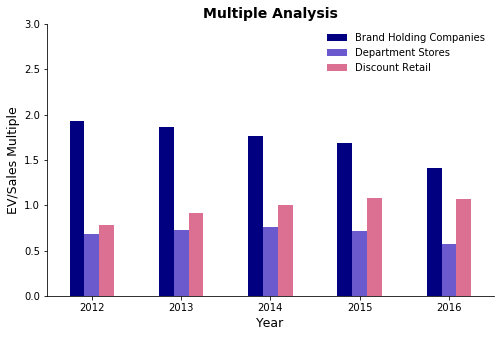

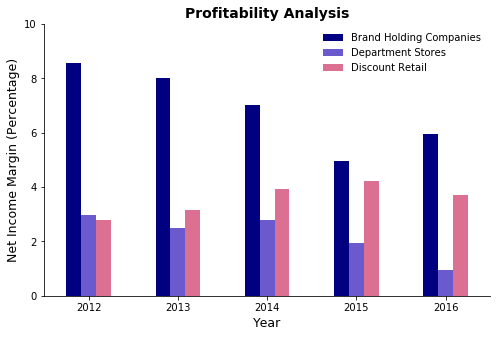

In [16]:
fig, ax = plt.subplots()        # create axis object axe
evsales_groups_yearly.plot(ax=ax, #graphing EV/Sales by sector over time
                kind='bar',      #we decided that bar graphs was the best way of displaying
                                 #data since we have three distinct categories  
                 color=['navy','slateblue','palevioletred'],
                 rot = 0,        #make year labels horizontal
                 figsize = (8,5))  #make graph bigger
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.legend(frameon = False)          #get rid of the box around the legend
ax.set_title('Multiple Analysis', #setting title
             fontsize = 14, 
             color = 'black',
            fontweight = 'bold')
ax.set_ylabel('EV/Sales Multiple', #setting y axis
              fontsize = 12.5,
              color = 'black')
ax.set_ylim(0,3)
ax.set_xlabel('Year',
              fontsize = 12.5,
              color = 'black')

fig, ax = plt.subplots()        # create axis object axe
nim_groups.T.plot(ax=ax,        #graphing net income margin by sector, transforming it so that
                                # year is on the x axis
                kind='bar',
                 color=['navy','slateblue','palevioletred'],
                 rot = 0,            #want year labels to be horizontal
                 figsize = (8,5))      #change size
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.legend(frameon = False)            #get rid of box around legend
ax.set_title('Profitability Analysis', 
             fontsize = 14, 
             color = 'black',
            fontweight = 'bold')
ax.set_ylabel('Net Income Margin (Percentage)',
              fontsize = 12.5,
              color = 'black')
ax.set_ylim(0,10)
ax.set_xlabel('Year',
              fontsize = 12.5,
              color = 'black')

#### Performance Metrics Analysis
In the charts titled ‘Multiple Analysis’ and “Profitability Analysis,” we observe parallels between the performances of the three segments. Brand holding companies widely outpace the other two segments in terms of EV/sales and profitability. Unsurprisingly, department stores lag behind significantly, likely due to overexposure to brick-and-mortar real estate as well as other factors. Finally, we observe steadily rising EV/sales and profitability from discount retailers, which is potentially due to the fact that consumers have exhibited increased frugality when purchasing goods and apparel, instead opting for experiences when allocating their discretionary spending (think MoviePass). Interestingly enough, between 2015 and 2016, the profitability trajectories of brand holding companies and discount retailers reversed, with the former outperforming the previous year and the latter underperforming the previous year. 

### Performance Drivers

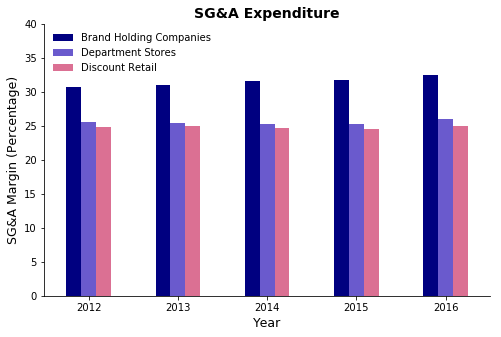

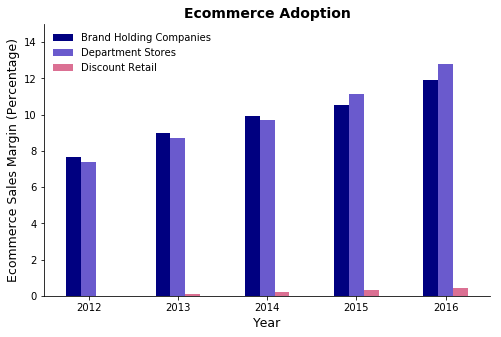

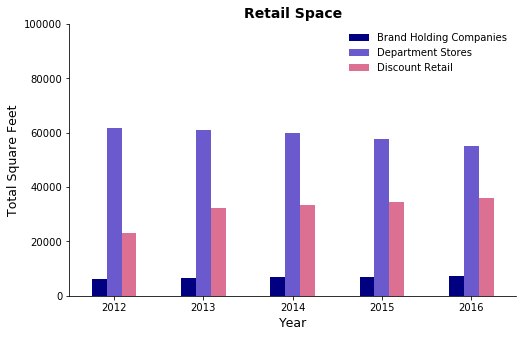

In [17]:
fig, ax = plt.subplots()        # create axis object axe
sga_groups.T.plot(ax=ax,        #SG&A Margin, transposed so year can be on x axis
                kind='bar',
                 color=['navy','slateblue','palevioletred'],
                 rot = 0,
                 figsize = (8,5))
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.legend(frameon = False)
ax.set_title('SG&A Expenditure', 
             fontsize = 14, 
             color = 'black',
            fontweight = 'bold')
ax.set_ylabel('SG&A Margin (Percentage)',
              fontsize = 12.5,
              color = 'black')
ax.set_ylim(0,40)
ax.set_xlabel('Year',
              fontsize = 12.5,
              color = 'black')

fig, ax = plt.subplots()        
ec_groups.T.plot(ax=ax,         #E-commerce as a percentage of revenue
                kind='bar',
                 color=['navy','slateblue','palevioletred'],
                 rot = 0,
                 figsize = (8,5))
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.legend(frameon = False)
ax.set_title('Ecommerce Adoption', 
             fontsize = 14, 
             color = 'black',
            fontweight = 'bold')
ax.set_ylabel('Ecommerce Sales Margin (Percentage)',
              fontsize = 12.5,
              color = 'black')
ax.set_ylim(0,15)
ax.set_xlabel('Year',
              fontsize = 12.5,
              color = 'black')

fig, ax = plt.subplots()        # create axis object axe
sf_groups.T.plot(ax=ax,         #square footage
                kind='bar',
                 color=['navy','slateblue','palevioletred'],
                 rot = 0,
                 figsize = (8,5))
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.legend(frameon = False)
ax.set_title('Retail Space', 
             fontsize = 14, 
             color = 'black',
            fontweight = 'bold')
ax.set_ylabel('Total Square Feet',
              fontsize = 12.5,
              color = 'black')
ax.set_ylim(0,100000)
ax.set_xlabel('Year',
              fontsize = 12.5,
              color = 'black')

#### Performance Drivers Analysis
Brand holding companies exhibit the highest SG&A margins, comparable e-commerce adoption rates as department stores, and minimal retail space. SG&A margins and retail space have remained largely constant over the period while e-commerce sales margins have increased, falling behind department stores in 2015.

Department stores spend slightly more than discount retailers on SG&A as a percentage of revenue but still lag behind brand holding companies significantly. They have also been ramping up on encouraging consumers to utilize digital mediums when purchasing goods, indicated by the strong growth in ecommerce sales margins, outpacing brand holding companies in 2015. Department stores have the largest presence in terms of total retail space, which has gradually declined during the five year period. We observe that though department stores exhibit the strongest e-commerce platforms of the three segments, they still post the weakest performance with regards to multiples and profitability.

Finally, discount retailers spend the slightly less on SG&A than department stores. Their e-commerce presence is essentially non-existent, as four out of the five firms in our sample did not generate any revenue online at all. The quantity of retail space for discount retailers falls very much at the center between brand holding companies on the low end and department stores at the high end. We find that despite lack of e-commerce presence, discounters are faring very well. Additionally, we observe that the average quantity of total retail space per firm has slightly increased for discount retailers over the period, despite this trending the opposite way for department stores.

## Regression Analysis
Next, we want to run regressions to see how these drivers will specificaly affect the performance metrics. In order for us to do this, we need to consolidate these drivers and performance metrics into one dataframe.

We will once again have to consolidate our EV/Sales data by year, only this time without the groupby. This makes things trickier because we have several columns that are not datetime. We will drop these columns, except for Ticker, which we will set as the index so that we can keep track of which company is which.

In [18]:
evsales.head()

,Category,Company Name,Ticker,Measure,4/30/12,7/31/12,10/31/12,1/31/13,4/30/13,7/31/13,...,10/31/14,1/31/15,4/30/15,7/31/15,10/31/15,1/31/16,4/30/16,7/31/16,10/31/16,1/31/17
0,Department Stores,Kohl's Corp,KSS,EV Sales,0.82,0.77,0.84,0.77,0.76,0.81,...,0.85,0.85,0.96,0.87,0.73,0.71,0.65,0.59,0.62,0.67
1,Department Stores,Macy's Inc,M,EV Sales,0.80,0.75,0.79,0.78,0.78,0.86,...,0.95,1.01,0.98,1.03,0.90,0.72,0.73,0.65,0.68,0.71
2,Department Stores,Nordstrom Inc,JWN,EV Sales,1.19,1.08,1.17,1.10,1.05,1.12,...,1.21,1.30,1.29,1.22,1.16,0.84,0.80,0.64,0.74,0.77
3,Department Stores,Dillard's,DDS,EV Sales,0.58,0.60,0.66,0.71,0.65,0.70,...,0.81,0.84,0.86,0.72,0.63,0.52,0.51,0.42,0.43,0.45
4,Department Stores,JC Penney Co Inc,JCP,EV Sales,0.57,0.48,0.50,0.46,0.44,0.55,...,0.59,0.56,0.53,0.56,0.57,0.55,0.54,0.55,0.57,0.57


In [19]:
evsales = evsales.drop(['Category','Company Name', 'Measure'], axis=1) 
evsales = evsales.set_index(['Ticker'])

In [20]:
evsales.head()

,4/30/12,7/31/12,10/31/12,1/31/13,4/30/13,7/31/13,10/31/13,1/31/14,4/30/14,7/31/14,10/31/14,1/31/15,4/30/15,7/31/15,10/31/15,1/31/16,4/30/16,7/31/16,10/31/16,1/31/17
Ticker,,,,,,,,,,,,,,,,,,,,
KSS,0.82,0.77,0.84,0.77,0.76,0.81,0.80,0.83,0.81,0.80,0.85,0.85,0.96,0.87,0.73,0.71,0.65,0.59,0.62,0.67
M,0.80,0.75,0.79,0.78,0.78,0.86,0.81,0.91,0.93,0.95,0.95,1.01,0.98,1.03,0.90,0.72,0.73,0.65,0.68,0.71
JWN,1.19,1.08,1.17,1.10,1.05,1.12,1.06,1.11,1.08,1.17,1.21,1.30,1.29,1.22,1.16,0.84,0.80,0.64,0.74,0.77
DDS,0.58,0.60,0.66,0.71,0.65,0.70,0.65,0.70,0.69,0.78,0.81,0.84,0.86,0.72,0.63,0.52,0.51,0.42,0.43,0.45
JCP,0.57,0.48,0.50,0.46,0.44,0.55,0.57,0.57,0.54,0.59,0.59,0.56,0.53,0.56,0.57,0.55,0.54,0.55,0.57,0.57


Transforming so that the dates become the index

In [21]:
evsales = evsales.T
evsales.head()

Ticker,KSS,M,JWN,DDS,JCP,SHLD,DSW,BONT,FINL,DKS,...,GCO,FOSL,CAL,LULU,GES,EXPR,TLRD,SHOO,URBN,nan
4/30/12,0.82,0.80,1.19,0.58,0.57,0.23,0.98,0.34,0.63,0.98,...,0.74,2.56,0.29,9.75,0.94,1.07,0.77,1.65,1.52,NaN
7/31/12,0.77,0.75,1.08,0.60,0.48,0.20,1.03,0.36,0.58,0.99,...,0.66,2.19,0.30,8.31,0.76,0.83,0.62,1.51,1.48,NaN
10/31/12,0.84,0.79,1.17,0.66,0.50,0.21,1.17,0.37,0.59,1.05,...,0.69,1.81,0.37,8.15,0.81,0.64,0.65,1.40,1.89,NaN
1/31/13,0.77,0.78,1.10,0.71,0.46,0.21,1.20,0.42,0.52,1.01,...,0.58,1.94,0.41,7.94,0.72,0.64,0.61,1.53,1.96,NaN
4/30/13,0.76,0.78,1.05,0.65,0.44,0.20,1.19,0.39,0.52,0.96,...,0.56,2.10,0.39,6.87,0.74,0.69,0.58,1.44,1.90,NaN


In [22]:
evsales = evsales.set_index(pd.DatetimeIndex(evsales.index))
evsales.index

DatetimeIndex(['2012-04-30', '2012-07-31', '2012-10-31', '2013-01-31',
               '2013-04-30', '2013-07-31', '2013-10-31', '2014-01-31',
               '2014-04-30', '2014-07-31', '2014-10-31', '2015-01-31',
               '2015-04-30', '2015-07-31', '2015-10-31', '2016-01-31',
               '2016-04-30', '2016-07-31', '2016-10-31', '2017-01-31'],
              dtype='datetime64[ns]', freq=None)

We will once again go through what we did before to consolidate into annual data

In [23]:
evsales_quarter = evsales.resample("Q-OCT").mean()
evsales_quarter.head()

Ticker,KSS,M,JWN,DDS,JCP,SHLD,DSW,BONT,FINL,DKS,...,GCO,FOSL,CAL,LULU,GES,EXPR,TLRD,SHOO,URBN,nan
2012-04-30,0.82,0.80,1.19,0.58,0.57,0.23,0.98,0.34,0.63,0.98,...,0.74,2.56,0.29,9.75,0.94,1.07,0.77,1.65,1.52,NaN
2012-07-31,0.77,0.75,1.08,0.60,0.48,0.20,1.03,0.36,0.58,0.99,...,0.66,2.19,0.30,8.31,0.76,0.83,0.62,1.51,1.48,NaN
2012-10-31,0.84,0.79,1.17,0.66,0.50,0.21,1.17,0.37,0.59,1.05,...,0.69,1.81,0.37,8.15,0.81,0.64,0.65,1.40,1.89,NaN
2013-01-31,0.77,0.78,1.10,0.71,0.46,0.21,1.20,0.42,0.52,1.01,...,0.58,1.94,0.41,7.94,0.72,0.64,0.61,1.53,1.96,NaN
2013-04-30,0.76,0.78,1.05,0.65,0.44,0.20,1.19,0.39,0.52,0.96,...,0.56,2.10,0.39,6.87,0.74,0.69,0.58,1.44,1.90,NaN


In [24]:
evsales_quarter = evsales_quarter.drop(evsales_quarter.columns[-1],
                                       axis=1) #dropping the last NaN column
evsales_quarter = evsales_quarter.rolling(window=4).mean() 
#taking the rolling average for the past 4 quarters
evsales_yearly = evsales_quarter.resample("12M", closed="left",loffset="-3M").last()
evsales_yearly

Ticker,KSS,M,JWN,DDS,JCP,SHLD,DSW,BONT,FINL,DKS,...,CHS,GCO,FOSL,CAL,LULU,GES,EXPR,TLRD,SHOO,URBN
2013-01-31,0.8000,0.7800,1.1350,0.6375,0.5025,0.2125,1.0950,0.3725,0.5800,1.0075,...,1.0150,0.6675,2.1250,0.3425,8.5375,0.8075,0.7950,0.6625,1.5225,1.7125
2014-01-31,0.8000,0.8400,1.0850,0.6750,0.5325,0.2300,1.3625,0.4150,0.6250,1.0600,...,0.9700,0.6225,2.1350,0.4500,6.3900,0.8475,0.7775,0.7425,1.6100,1.7750
2015-01-31,0.8275,0.9600,1.1900,0.7800,0.5700,0.2275,1.1050,0.3975,0.6475,0.9200,...,0.8700,0.6875,1.7725,0.5375,3.7350,0.6675,0.5650,1.2125,1.4675,1.3700
2016-01-31,0.8175,0.9075,1.1275,0.6825,0.5525,0.2025,0.9700,0.3775,0.5025,0.8275,...,0.7825,0.5300,1.1200,0.5625,4.1975,0.5425,0.6300,1.0775,1.5875,1.1500
2017-01-31,0.6325,0.6925,0.7375,0.4525,0.5575,0.1975,0.6550,0.3800,0.4175,0.7750,...,0.6225,0.4775,0.6700,0.4750,3.9425,0.4400,0.4525,0.6975,1.3875,0.9625


In [25]:
# convert index to Years (string) so it's consistent with the rest of our dataframes
evsales_yearly.index = evsales_yearly.index.astype(str, copy=True)
evsales_yearly = evsales_yearly.rename(index={'2013-01-31': '2012',
                                                              '2014-01-31':'2013',
                                                              '2015-01-31':'2014',
                                                              '2016-01-31':'2015',
                                                              '2017-01-31':'2016'})

In [26]:
evsales_yearly.head()

Ticker,KSS,M,JWN,DDS,JCP,SHLD,DSW,BONT,FINL,DKS,...,CHS,GCO,FOSL,CAL,LULU,GES,EXPR,TLRD,SHOO,URBN
2012,0.8000,0.7800,1.1350,0.6375,0.5025,0.2125,1.0950,0.3725,0.5800,1.0075,...,1.0150,0.6675,2.1250,0.3425,8.5375,0.8075,0.7950,0.6625,1.5225,1.7125
2013,0.8000,0.8400,1.0850,0.6750,0.5325,0.2300,1.3625,0.4150,0.6250,1.0600,...,0.9700,0.6225,2.1350,0.4500,6.3900,0.8475,0.7775,0.7425,1.6100,1.7750
2014,0.8275,0.9600,1.1900,0.7800,0.5700,0.2275,1.1050,0.3975,0.6475,0.9200,...,0.8700,0.6875,1.7725,0.5375,3.7350,0.6675,0.5650,1.2125,1.4675,1.3700
2015,0.8175,0.9075,1.1275,0.6825,0.5525,0.2025,0.9700,0.3775,0.5025,0.8275,...,0.7825,0.5300,1.1200,0.5625,4.1975,0.5425,0.6300,1.0775,1.5875,1.1500
2016,0.6325,0.6925,0.7375,0.4525,0.5575,0.1975,0.6550,0.3800,0.4175,0.7750,...,0.6225,0.4775,0.6700,0.4750,3.9425,0.4400,0.4525,0.6975,1.3875,0.9625


Now we need to transpose it back so that we can append it to the rest of our data.

In [27]:
evsales_yearly = evsales_yearly.T.reset_index()
evsales_yearly.head()

,Ticker,2012,2013,2014,2015,2016
0,KSS,0.8000,0.8000,0.8275,0.8175,0.6325
1,M,0.7800,0.8400,0.9600,0.9075,0.6925
2,JWN,1.1350,1.0850,1.1900,1.1275,0.7375
3,DDS,0.6375,0.6750,0.7800,0.6825,0.4525
4,JCP,0.5025,0.5325,0.5700,0.5525,0.5575


Great, except we don't know what this is! Let's add back the Measure column so we know it's EV/Sales

In [28]:
evsales_yearly['Measure'] = 'EV Sales'
evsales_yearly.head()

,Ticker,2012,2013,2014,2015,2016,Measure
0,KSS,0.8000,0.8000,0.8275,0.8175,0.6325,EV Sales
1,M,0.7800,0.8400,0.9600,0.9075,0.6925,EV Sales
2,JWN,1.1350,1.0850,1.1900,1.1275,0.7375,EV Sales
3,DDS,0.6375,0.6750,0.7800,0.6825,0.4525,EV Sales
4,JCP,0.5025,0.5325,0.5700,0.5525,0.5575,EV Sales


Now we're ready to append.

In [29]:
combo1 = sga_margin.append(ec_margin) # Append E-Commerce data to SG&A Margin Data
combo2 = combo1.append(square_footage) # add on square footage data
combo_evs = evsales_yearly.append(combo2) # add on EV/Sales Data

In [30]:
combo_evs

,2012,2013,2014,2015,2016,Category,Company Name,Measure,Ticker
0,0.8000,0.8000,0.8275,0.8175,0.6325,NaN,NaN,EV Sales,KSS
1,0.7800,0.8400,0.9600,0.9075,0.6925,NaN,NaN,EV Sales,M
2,1.1350,1.0850,1.1900,1.1275,0.7375,NaN,NaN,EV Sales,JWN
3,0.6375,0.6750,0.7800,0.6825,0.4525,NaN,NaN,EV Sales,DDS
4,0.5025,0.5325,0.5700,0.5525,0.5575,NaN,NaN,EV Sales,JCP
5,0.2125,0.2300,0.2275,0.2025,0.1975,NaN,NaN,EV Sales,SHLD
6,1.0950,1.3625,1.1050,0.9700,0.6550,NaN,NaN,EV Sales,DSW
7,0.3725,0.4150,0.3975,0.3775,0.3800,NaN,NaN,EV Sales,BONT
8,0.5800,0.6250,0.6475,0.5025,0.4175,NaN,NaN,EV Sales,FINL
9,1.0075,1.0600,0.9200,0.8275,0.7750,NaN,NaN,EV Sales,DKS


The index is repeating, so we have to tell it to be a continuous stream.

In [31]:
combo_evs.index = range(len(combo_evs.index))
combo_evs

,2012,2013,2014,2015,2016,Category,Company Name,Measure,Ticker
0,0.8000,0.8000,0.8275,0.8175,0.6325,NaN,NaN,EV Sales,KSS
1,0.7800,0.8400,0.9600,0.9075,0.6925,NaN,NaN,EV Sales,M
2,1.1350,1.0850,1.1900,1.1275,0.7375,NaN,NaN,EV Sales,JWN
3,0.6375,0.6750,0.7800,0.6825,0.4525,NaN,NaN,EV Sales,DDS
4,0.5025,0.5325,0.5700,0.5525,0.5575,NaN,NaN,EV Sales,JCP
5,0.2125,0.2300,0.2275,0.2025,0.1975,NaN,NaN,EV Sales,SHLD
6,1.0950,1.3625,1.1050,0.9700,0.6550,NaN,NaN,EV Sales,DSW
7,0.3725,0.4150,0.3975,0.3775,0.3800,NaN,NaN,EV Sales,BONT
8,0.5800,0.6250,0.6475,0.5025,0.4175,NaN,NaN,EV Sales,FINL
9,1.0075,1.0600,0.9200,0.8275,0.7750,NaN,NaN,EV Sales,DKS


For the regression we will be looking at how these companies changed over the five periods, so we will create a new column for this.

In [32]:
combo_evs['Delta'] = combo_evs['2016']/combo_evs['2012'] - 1

Next, we will make new dataframes based on "Measure" and merge them together so that each company will have multiple columns that are change in measure over the 5 years. We will also correct for the companies that do not have a number in their cell for the year 2012.

In [33]:
combo_evs.at[134, 'Delta'] = combo_evs.at[134, '2016']/combo_evs.at[134, '2013'] - 1 # Correct for Burlington

evs_delta = combo_evs[combo_evs['Measure'] == 'EV Sales'] # selecting EV Sales
evs_delta.at[14, 'Delta'] = evs_delta.at[14, '2016']/evs_delta.at[14, '2014'] - 1 #correct for Burlington
evs_delta.at[15, 'Delta'] = evs_delta.at[15, '2016']/evs_delta.at[15, '2013'] - 1 #correct for Stein Mart
evs_delta.at[23, 'Delta'] = evs_delta.at[23, '2016']/evs_delta.at[23, '2014'] - 1 #correct for MK

sga_delta = combo_evs[combo_evs['Measure'] == 'SG&A Margin'] # selecting SG&A
sga_delta.at[54, 'Delta'] = sga_delta.at[54, '2016']/sga_delta.at[54, '2014'] - 1 # correct for Burlington
sga_delta.at[55, 'Delta'] = sga_delta.at[55, '2016']/sga_delta.at[55, '2013'] - 1 #correct for Stein Mart
sga_delta.at[63, 'Delta'] = sga_delta.at[63, '2016']/sga_delta.at[63, '2014'] - 1 #correct for MK

ec_delta = combo_evs[combo_evs['Measure'] == 'Ecommerce Sales Margin'] # selecting E-commerce
ec_delta.at[94, 'Delta'] = ec_delta.at[94, '2016']/ec_delta.at[94, '2014'] - 1 #correct for Burlington
ec_delta.at[95, 'Delta'] = ec_delta.at[95, '2016']/ec_delta.at[95, '2013'] - 1  # correct for Stein Mart
ec_delta.at[103, 'Delta'] = ec_delta.at[103, '2016']/ec_delta.at[103, '2014'] - 1 #correct for MK
ec_delta = ec_delta.fillna(0)  # change discount retailers with 0 ecommerce sales from NaN to 0

sf_delta = combo_evs[combo_evs['Measure'] == 'Total Square Footage']
sf_delta.at[134, 'Delta'] = sf_delta.at[134, '2016']/sf_delta.at[134, '2014'] - 1 #correct for Burlington
sf_delta.at[135, 'Delta'] = sf_delta.at[135, '2016']/sf_delta.at[135, '2013'] - 1  # correct for Stein Mart
sf_delta.at[143, 'Delta'] = sf_delta.at[143, '2016']/sf_delta.at[143, '2014'] - 1 #correct for MK


/Users/Crystal/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


## Regression - EV/Sales

In [34]:
#Create a shortcut for the columns that we want to take out from the dataframes,
# that we will then use to merge to form a new dataframe
col_list = ['Ticker', 'Delta'] 

#Merge based on companies
a_delta1 = pd.merge(evs_delta[col_list], sga_delta[col_list], how='left', on='Ticker')
b_delta1 = pd.merge(a_delta1, ec_delta[col_list],how='left',on='Ticker')
finaldelta1 = pd.merge(b_delta1, sf_delta[['Category',
                                           'Company Name',
                                           'Ticker',
                                           'Delta']],how='left',on='Ticker')
finaldelta1.columns = ['Ticker',
                       'EV_Sales',
                       'SGA_Margin',
                       'Ecommerce_Margin',
                       'Category',
                       'Company_Name',
                       'Square_Footage']

finaldelta1.head()

,Ticker,EV_Sales,SGA_Margin,Ecommerce_Margin,Category,Company_Name,Square_Footage
0,KSS,-0.209375,0.072300,1.050734,Department Stores,Kohl's Corp,-0.004104
1,M,-0.112179,0.046345,0.847936,Department Stores,Macy's Inc,-0.135458
2,JWN,-0.350220,0.056740,0.758871,Department Stores,Nordstrom Inc,0.178015
3,DDS,-0.290196,0.042003,0.789655,Department Stores,Dillard's,-0.059273
4,JCP,0.109453,-0.187320,0.571247,Department Stores,JC Penney Co Inc,-0.074373


To make things consistent, we will set the order of the columns

In [35]:
columnorder = ['Category', 'Company_Name', 'Ticker', 'EV_Sales', 'SGA_Margin', 'Ecommerce_Margin', 'Square_Footage']
finaldelta1 = finaldelta1.reindex(columns=columnorder)

finaldelta1.head()

,Category,Company_Name,Ticker,EV_Sales,SGA_Margin,Ecommerce_Margin,Square_Footage
0,Department Stores,Kohl's Corp,KSS,-0.209375,0.072300,1.050734,-0.004104
1,Department Stores,Macy's Inc,M,-0.112179,0.046345,0.847936,-0.135458
2,Department Stores,Nordstrom Inc,JWN,-0.350220,0.056740,0.758871,0.178015
3,Department Stores,Dillard's,DDS,-0.290196,0.042003,0.789655,-0.059273
4,Department Stores,JC Penney Co Inc,JCP,0.109453,-0.187320,0.571247,-0.074373


Now we have the dataframe that we can run the regression on.

### Regressing EV/Sales for All Sectors

In [36]:
evs_results = smf.ols("EV_Sales ~ SGA_Margin + Ecommerce_Margin + Square_Footage",
                  data=finaldelta1).fit()  
                                         
print(evs_results.summary())

                            OLS Regression Results                            
Dep. Variable:               EV_Sales   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     1.743
Date:                Thu, 21 Dec 2017   Prob (F-statistic):              0.176
Time:                        23:47:02   Log-Likelihood:                -15.274
No. Observations:                  40   AIC:                             38.55
Df Residuals:                      36   BIC:                             45.30
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0121      0.089  

Negative coefficients for SG&A Margin and Ecommerce Margin indicate negative relationships between EV/Sales growth over time and growths of SG&A Margin and Ecommerce Margin (only slightly negative). It is logical for investors to react adversely to increased SG&A spending, which would definitely whittle a firm’s bottom line and could potentially indicate inefficient cost allocation.

Next we'd like to see how these relationships might be different depending on the type of retail. We will run three regressions, one for each category.

In [37]:
# Make seperate dataframes based on category
ds_evs = finaldelta1[finaldelta1['Category'] == 'Department Stores']
dr_evs = finaldelta1[finaldelta1['Category'] == 'Discount Retail']
bhc_evs = finaldelta1[finaldelta1['Category'] == 'Brand Holding Companies']

### Regressing EV/Sales for Department Store 

In [38]:
#Run regression for EV/Sales department stores 
ds_evs_results = smf.ols("EV_Sales ~ SGA_Margin + Ecommerce_Margin + Square_Footage",
                  data=ds_evs).fit()  
                                         
print(ds_evs_results.summary())

                            OLS Regression Results                            
Dep. Variable:               EV_Sales   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     2.577
Date:                Thu, 21 Dec 2017   Prob (F-statistic):              0.127
Time:                        23:47:02   Log-Likelihood:                 4.9339
No. Observations:                  12   AIC:                            -1.868
Df Residuals:                       8   BIC:                           0.07190
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1051      0.123  

/Users/Crystal/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


These coefficients tell us for department stores, there is a strongly negative relationship between changes in EV/Sales and SG&A Margin, and a negative relationship between changes in EV/Sales and Square Footage. The second observation indicates that department stores tend to garner worse sentiments from investors when they expand their brick-and-mortar operations. In the case of department stores, we observe a positive, but potentially insignificant relationship between EV/Sales growth and Ecommerce Margin growth. 

### Regressing EV/Sales for Discount Retail

In [39]:
#Run regression for EV/Sales discount retail stores 
dr_evs_results = smf.ols("EV_Sales ~ SGA_Margin + Ecommerce_Margin + Square_Footage",
                  data=dr_evs).fit()  
                                         
print(dr_evs_results.summary())

                            OLS Regression Results                            
Dep. Variable:               EV_Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1072.
Date:                Thu, 21 Dec 2017   Prob (F-statistic):             0.0224
Time:                        23:47:02   Log-Likelihood:                 21.546
No. Observations:                   5   AIC:                            -35.09
Df Residuals:                       1   BIC:                            -36.65
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3967      0.007  

/Users/Crystal/anaconda/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


Wow, that's a high R-squared! This is probably because we have a low number of observations and many discount retailers did not have an E-commerce margin. Let's try it without that variable.

In [40]:
#Run regression for EV/Sales discount retail stores 
dr_evs_results = smf.ols("EV_Sales ~ SGA_Margin + Square_Footage",
                  data=dr_evs).fit()  
                                         
print(dr_evs_results.summary())

                            OLS Regression Results                            
Dep. Variable:               EV_Sales   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                 -0.298
Method:                 Least Squares   F-statistic:                    0.5408
Date:                Thu, 21 Dec 2017   Prob (F-statistic):              0.649
Time:                        23:47:02   Log-Likelihood:                 2.4359
No. Observations:                   5   AIC:                             1.128
Df Residuals:                       2   BIC:                          -0.04344
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1903      0.151      1.

/Users/Crystal/anaconda/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


This looks much more reasonable now. These results indicate there there may also be a strong negative relationship between changes in EV/Sales and SG&A Margin for discount retailers, but a positive relationship between changes in EV/Sales and Square Footage. These are both logical as discount retailers rely on cost cutting and also depend heavily (almost completely) on brick-and-mortar operation to generate revenue.

### Regressing EV/Sales for Brand Holding Companies

In [41]:
#Run regression for EV/Sales Brands 
bhc_evs_results = smf.ols("EV_Sales ~ SGA_Margin + Ecommerce_Margin + Square_Footage",
                  data=bhc_evs).fit()  
                                         
print(bhc_evs_results.summary())

                            OLS Regression Results                            
Dep. Variable:               EV_Sales   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                 -0.067
Method:                 Least Squares   F-statistic:                    0.5399
Date:                Thu, 21 Dec 2017   Prob (F-statistic):              0.661
Time:                        23:47:02   Log-Likelihood:                -12.425
No. Observations:                  23   AIC:                             32.85
Df Residuals:                      19   BIC:                             37.39
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0916      0.160  

As observed in both department stores and discount retailers, we also observe a negative relationship between EV/Sales growth and increased SG&A spending for brand holding companies. Like in discount retailers, we observe a positive relationship between EV/Sales growth and increased retail square footage. This could mean that due to the strong performance and minimal brick-and-mortar operations of brand holding companies, this segment benefits from conservatively growing their number of physical locations.

## Regression - Net Income Margin

Now we will run regressions using Net Income Margin as the performance metric, repeating what we did for EV/Sales

In [42]:
#Add the three drivers (combo2) to the net income margin dataframe
combo_ni = net_income_margin.append(combo2) 
combo_ni.index = range(len(combo_ni.index)) #make index a continuous non-repeating stream of numbers
#Make column that shows the percent change from 2012 to 2016
combo_ni['Delta'] = combo_ni['2016']/combo_ni['2012'] - 1 

In [43]:
combo_ni


,Category,Company Name,Ticker,Measure,2012,2013,2014,2015,2016,Delta
0,Department Stores,Kohl's Corp,KSS,Net Income Margin,5.11,4.67,4.56,3.50,2.98,-0.416830
1,Department Stores,Macy's Inc,M,Net Income Margin,4.82,5.32,5.43,3.96,2.40,-0.502075
2,Department Stores,Nordstrom Inc,JWN,Net Income Margin,6.06,5.85,5.33,4.16,2.40,-0.603960
3,Department Stores,Dillard's,DDS,Net Income Margin,4.98,4.84,4.89,3.99,2.64,-0.469880
4,Department Stores,JC Penney Co Inc,JCP,Net Income Margin,-7.59,-10.78,-5.85,-4.06,0.01,-1.001318
5,Department Stores,Sears Holdings,SHLD,Net Income Margin,-2.33,-3.77,-5.39,-4.49,-10.03,3.304721
6,Department Stores,DSW Inc.,DSW,Net Income Margin,6.49,6.39,6.14,5.19,4.59,-0.292758
7,Department Stores,Bon-Ton Stores,BONT,Net Income Margin,-0.72,-0.13,-0.25,-2.05,-2.37,2.291667
8,Department Stores,Finish Line Inc,FINL,Net Income Margin,4.95,4.60,4.50,1.22,-0.99,-1.200000
9,Department Stores,Dick's Sporting Goods,DKS,Net Income Margin,4.98,5.43,5.05,4.54,3.63,-0.271084


Again we will select out the data that we want to merge and adjust for the cells that don't have data

In [44]:
ni_delta = combo_ni[combo_ni['Measure'] == 'Net Income Margin'] # selecting Net Income Margin
ni_delta.at[14, 'Delta'] = ni_delta.at[14, '2016']/ni_delta.at[14, '2014'] - 1 #correct for Burlington
ni_delta.at[15, 'Delta'] = ni_delta.at[15, '2016']/ni_delta.at[15, '2013'] - 1 #correct for Stein Mart
ni_delta.at[23, 'Delta'] = ni_delta.at[23, '2016']/ni_delta.at[23, '2014'] - 1 #correct for MK

sga_delta = combo_ni[combo_ni['Measure'] == 'SG&A Margin'] # selecting SG&A
sga_delta.at[54, 'Delta'] = sga_delta.at[54, '2016']/sga_delta.at[54, '2014'] - 1 # correct for Burlington
sga_delta.at[55, 'Delta'] = sga_delta.at[55, '2016']/sga_delta.at[55, '2013'] - 1 #correct for Stein Mart
sga_delta.at[63, 'Delta'] = sga_delta.at[63, '2016']/sga_delta.at[63, '2014'] - 1 #correct for MK

ec_delta = combo_ni[combo_ni['Measure'] == 'Ecommerce Sales Margin'] # selecting E-commerce
ec_delta.at[94, 'Delta'] = ec_delta.at[94, '2016']/ec_delta.at[94, '2014'] - 1 #correct for Burlington
ec_delta.at[95, 'Delta'] = ec_delta.at[95, '2016']/ec_delta.at[95, '2013'] - 1  # correct for Stein Mart
ec_delta.at[103, 'Delta'] = ec_delta.at[103, '2016']/ec_delta.at[103, '2014'] - 1 #correct for MK
ec_delta = ec_delta.fillna(0)  # change discount retailers with 0 ecommerce sales from NaN to 0

sf_delta = combo_ni[combo_ni['Measure'] == 'Total Square Footage']
sf_delta.at[134, 'Delta'] = sf_delta.at[134, '2016']/sf_delta.at[134, '2014'] - 1 #correct for Burlington
sf_delta.at[135, 'Delta'] = sf_delta.at[135, '2016']/sf_delta.at[135, '2013'] - 1  # correct for Stein Mart
sf_delta.at[143, 'Delta'] = sf_delta.at[143, '2016']/sf_delta.at[143, '2014'] - 1 #correct for MK

/Users/Crystal/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


In [45]:
#Create a shortcut for the columns that we want to take out from the dataframes,
# that we will then use to merge to form a new dataframe

col_list = ['Ticker', 'Delta']

a_delta2 = pd.merge(ni_delta[['Category', 'Company Name', 'Ticker', 'Delta']], sga_delta[col_list],
                  how='left',
                  on='Ticker')
b_delta2 = pd.merge(a_delta2, ec_delta[col_list],
                   how='left',
                   on='Ticker')
finaldelta2 = pd.merge(b_delta2, sf_delta[col_list],
                   how='left',
                   on='Ticker')

finaldelta2.columns = ['Category',
                       'Company_Name',
                       'Ticker',
                       'Net_Income_Margin',
                       'SGA_Margin',
                       'Ecommerce_Margin',
                       'Square_Footage']

finaldelta2.head()

,Category,Company_Name,Ticker,Net_Income_Margin,SGA_Margin,Ecommerce_Margin,Square_Footage
0,Department Stores,Kohl's Corp,KSS,-0.416830,0.072300,1.050734,-0.004104
1,Department Stores,Macy's Inc,M,-0.502075,0.046345,0.847936,-0.135458
2,Department Stores,Nordstrom Inc,JWN,-0.603960,0.056740,0.758871,0.178015
3,Department Stores,Dillard's,DDS,-0.469880,0.042003,0.789655,-0.059273
4,Department Stores,JC Penney Co Inc,JCP,-1.001318,-0.187320,0.571247,-0.074373


### Regressing Net Income Margin for All Sectors

In [46]:
nim_results = smf.ols("Net_Income_Margin ~ SGA_Margin + Ecommerce_Margin + Square_Footage",
                  data=finaldelta2).fit()  
                                         
print(nim_results.summary())

                            OLS Regression Results                            
Dep. Variable:      Net_Income_Margin   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.7991
Date:                Thu, 21 Dec 2017   Prob (F-statistic):              0.503
Time:                        23:47:03   Log-Likelihood:                -54.637
No. Observations:                  40   AIC:                             117.3
Df Residuals:                      36   BIC:                             124.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0866      0.239  

Okay, that's a pretty low R-squared. Maybe looking at each individual sector will be more helpful. Let's split it into three different dataframes and regress them seperately.

In [47]:
ds_ni = finaldelta2[finaldelta2['Category'] == 'Department Stores']
dr_ni = finaldelta2[finaldelta2['Category'] == 'Discount Retail']
bhc_ni = finaldelta2[finaldelta2['Category'] == 'Brand Holding Companies']

### Regressing Net Income Margin for Department Stores

In [48]:
#Run regression for department stores
ds_ni_results = smf.ols("Net_Income_Margin ~ SGA_Margin + Ecommerce_Margin + Square_Footage",
                  data=ds_ni).fit()  
                                         
print(ds_ni_results.summary())

                            OLS Regression Results                            
Dep. Variable:      Net_Income_Margin   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                 -0.068
Method:                 Least Squares   F-statistic:                    0.7672
Date:                Thu, 21 Dec 2017   Prob (F-statistic):              0.544
Time:                        23:47:03   Log-Likelihood:                -19.761
No. Observations:                  12   AIC:                             47.52
Df Residuals:                       8   BIC:                             49.46
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0680      0.960  

/Users/Crystal/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


Great, much better! Looking at P-value for Ecommerce it seems that it's not that important of a variable. This goes against what we initally expected due to how much online retail and omni-channel integration is stressed these days. Let's run the regression without that variable.

In [49]:
ds_ni_results = smf.ols("Net_Income_Margin ~ SGA_Margin + Square_Footage", #took out Ecommerce
                  data=ds_ni).fit()  
                                         
print(ds_ni_results.summary())

                            OLS Regression Results                            
Dep. Variable:      Net_Income_Margin   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     1.289
Date:                Thu, 21 Dec 2017   Prob (F-statistic):              0.322
Time:                        23:47:03   Log-Likelihood:                -19.767
No. Observations:                  12   AIC:                             45.53
Df Residuals:                       9   BIC:                             46.99
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.1434      0.435     -0.

/Users/Crystal/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


That gives us a similar R-squared, but lowers the p-scores and standard errors slightly. We see a strong and substantive positive relationship between SG&A spending growth and profit margin growth. This is contrary to what we found in the previous section, which showed a negative relationship between SG&A spending growth and EV/Sales growth.

### Regressing Net Income Margin for Discount Retail

In [50]:
dr_ni_results = smf.ols("Net_Income_Margin ~ SGA_Margin + Ecommerce_Margin + Square_Footage",
                  data=dr_ni).fit()  
                                         
print(dr_ni_results.summary())

                            OLS Regression Results                            
Dep. Variable:      Net_Income_Margin   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                 -1.654
Method:                 Least Squares   F-statistic:                    0.1690
Date:                Thu, 21 Dec 2017   Prob (F-statistic):              0.907
Time:                        23:47:03   Log-Likelihood:                -6.0408
No. Observations:                   5   AIC:                             20.08
Df Residuals:                       1   BIC:                             18.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0350      1.619  

/Users/Crystal/anaconda/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


Once again, a very high P-value for E-commerce, but this is to be expected since discount retailers usually don't offer online sales. Given the large standard errors, we probably should not rely on this data. Let's try it again without E-Commerce like we did for EV/Sales.

In [51]:
dr_ni_results = smf.ols("Net_Income_Margin ~ SGA_Margin + Square_Footage",
                  data=dr_ni).fit()  
                                         
print(dr_ni_results.summary())

                            OLS Regression Results                            
Dep. Variable:      Net_Income_Margin   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                 -0.457
Method:                 Least Squares   F-statistic:                    0.3723
Date:                Thu, 21 Dec 2017   Prob (F-statistic):              0.729
Time:                        23:47:03   Log-Likelihood:                -6.2750
No. Observations:                   5   AIC:                             18.55
Df Residuals:                       2   BIC:                             17.38
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.3875      0.863     -0.

/Users/Crystal/anaconda/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


Removing the E-commerce variable amplifies the coefficients of the remaining two variables. Increasing SG&A has a particularly acute impact on net income for discount retailers. Additionally, those that increased their square footage benefited, indicating that those that expanded were able to take advantage of the increase in patronage at discount retailers, perhaps also gaining market share. It is important to note, however, that although the standard errors went down, they are still very large. 

### Regressing Net Income Margin for Brand Holding Companies

In [52]:
bhc_ni_results = smf.ols("Net_Income_Margin ~ SGA_Margin + Ecommerce_Margin + Square_Footage",
                  data=bhc_ni).fit()  
                                         
print(bhc_ni_results.summary())

                            OLS Regression Results                            
Dep. Variable:      Net_Income_Margin   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.9664
Date:                Thu, 21 Dec 2017   Prob (F-statistic):              0.429
Time:                        23:47:03   Log-Likelihood:                -19.832
No. Observations:                  23   AIC:                             47.66
Df Residuals:                      19   BIC:                             52.21
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0133      0.221  

The negative relationship between SG&A margin growth and profitability growth aligns with that between SG&A margin growth and EV/sales growth. It is interesting that e-commerce sales growth also has a significant negative relationship with profitability growth. Square footage doesn't seem to be a significant factor, which makes sense because a lot of these companies sell wholesale or have a larger online presence. 

## Conclusion
After analyzing performance metrics, performance drivers, and the relationships between them for a sample size of forty clothing retailers in the U.S., we have arrived at a few insights and found avenues for further exploration. To begin, the impact of change in e-commerce sales on both multiple expansion and profitability growth was a lot less notable than we had predicted. Regression analyses of the entire set of companies and category-specific analyses demonstrated that change in e-commerce sales margin is a weaker predictor of both multiple expansion and profitability growth than change in SG&A margin. We believe that these findings are a result of two factors. First, e-commerce sales currently do not occupy a large percentage of a firm’s revenue generation. Second, e-commerce sales margin may not be the most optimal metric with which to capture a firm’s digital capabilities. This is due to the fact that a firm’s digital ecosystem designed for customer extends far past merely the execution of transactions, capturing marketing, loyalty programs, and other mediums of interaction. 

Finally, we found that department stores exhibited negative correlations between retail square footage change and multiple expansion/profitability growth, while discount retailers and brand holding companies exhibited the opposite relationship. We believe that this outcome is contingent on how much retail space they already occupy (in the case of brand holding companies), whether firms have utilized the retail space effectively and efficiently (in the case of department stores), and whether their business model depends on brick-and-mortar retail (in the case of discount retailers). 

Through our analyses, we have observed different characteristics between different segments of the clothing retail universe, not all of which can be captured and demonstrated by pure data analysis. Given more time, we find it pertinent to analyze other performance metrics and performance drivers that could offer alternative perspectives of the current and future state of the retail industry. If given the objective to delve deeper into the impact of ecommerce and digitization on financial performance, we would aim to collect more data on customer loyalty, webpage visits, and percentage of revenue spent on specifically advertising, rather than SG&A as a whole. 